In [1]:
# importing librarires 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# style setttings for seaborn and matplotlib
sns.set(style = "whitegrid", palette = "muted", font_scale = 1.1)
plt.rcParams['figure.figsize'] = (10, 6)

# uploading full data table after etl
full_data = pd.read_csv (r"C:\Users\user\Desktop\perfume\tables\full_clean_data.csv")

In [2]:
# overview
full_data.info()
full_data.head()
full_data.isna().sum()
full_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sale_id            3000 non-null   int64 
 1   sale_date          3000 non-null   object
 2   perfume_id         3000 non-null   int64 
 3   perfume_name       3000 non-null   object
 4   brand              3000 non-null   object
 5   category           3000 non-null   object
 6   price              3000 non-null   int64 
 7   supplier_id        3000 non-null   int64 
 8   stock_quantity     3000 non-null   int64 
 9   reorder_level      3000 non-null   int64 
 10  last_restock_date  3000 non-null   object
 11  supplier_name      3000 non-null   object
 12  country            3000 non-null   object
 13  contact_email      3000 non-null   object
dtypes: int64(6), object(8)
memory usage: 328.3+ KB


,sale_id,perfume_id,price,supplier_id,stock_quantity,reorder_level
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,50.273333,139.813333,14.171000,319.224000,9.901333
std,866.169729,27.974729,27.339208,9.332923,265.008765,5.392460
min,1.000000,1.000000,100.000000,2.000000,13.000000,1.000000
25%,750.750000,27.000000,130.000000,6.000000,116.000000,6.000000
50%,1500.500000,50.500000,135.000000,13.000000,242.000000,9.000000
75%,2250.250000,74.000000,150.000000,22.000000,486.000000,14.000000
max,3000.000000,100.000000,280.000000,35.000000,977.000000,20.000000


In [3]:
full_data['sale_date'] = pd.to_datetime(full_data['sale_date'])
full_data['last_restock_date'] = pd.to_datetime(full_data['last_restock_date'])

In [4]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sale_id            3000 non-null   int64         
 1   sale_date          3000 non-null   datetime64[ns]
 2   perfume_id         3000 non-null   int64         
 3   perfume_name       3000 non-null   object        
 4   brand              3000 non-null   object        
 5   category           3000 non-null   object        
 6   price              3000 non-null   int64         
 7   supplier_id        3000 non-null   int64         
 8   stock_quantity     3000 non-null   int64         
 9   reorder_level      3000 non-null   int64         
 10  last_restock_date  3000 non-null   datetime64[ns]
 11  supplier_name      3000 non-null   object        
 12  country            3000 non-null   object        
 13  contact_email      3000 non-null   object        
dtypes: datet

In [5]:
full_data['sale_month'] = full_data['sale_date'].dt.to_period('M')
full_data['restock_month'] = full_data['last_restock_date'].dt.to_period('M')

brand
Hugo Boss              1
Jimmy Choo             1
Estee Lauder           1
Elie Saab              1
Dunhill                1
John Varvatos          1
Lacoste                1
Guerlain               1
Viktor & Rolf          1
Mugler                 1
Paco Rabanne           1
Ralph Lauren           1
Bentley                1
Marc Jacobs            1
Montblanc              2
Prada                  2
Valentino              2
Jean Paul Gaultier     2
Issey Miyake           2
Lancome                2
Abercrombie & Fitch    2
Givenchy               2
Atelier Cologne        2
Dolce & Gabbana        2
Bvlgari                2
Chloe                  2
Gucci                  3
Versace                3
Tiffany & Co.          3
Burberry               3
Byredo                 3
Chanel                 3
Hermes                 3
Maison Margiela        3
Giorgio Armani         3
Carolina Herrera       3
Diptyque               4
Tom Ford               6
Jo Malone              6
Yves Saint Laurent 

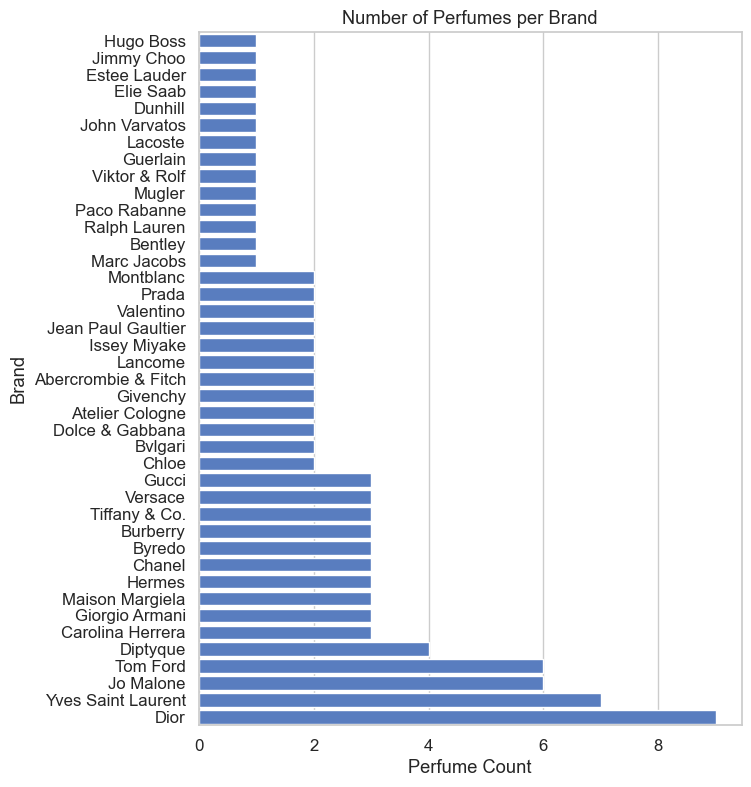

In [11]:
brand_counts = full_data.groupby("brand")['perfume_id'].nunique().sort_values()
print(brand_counts)

plt.figure(figsize=(7,9))
sns.barplot(x=brand_counts.values, y=brand_counts.index)
plt.title("Number of Perfumes per Brand")
plt.xlabel("Perfume Count")
plt.ylabel("Brand")
plt.show()

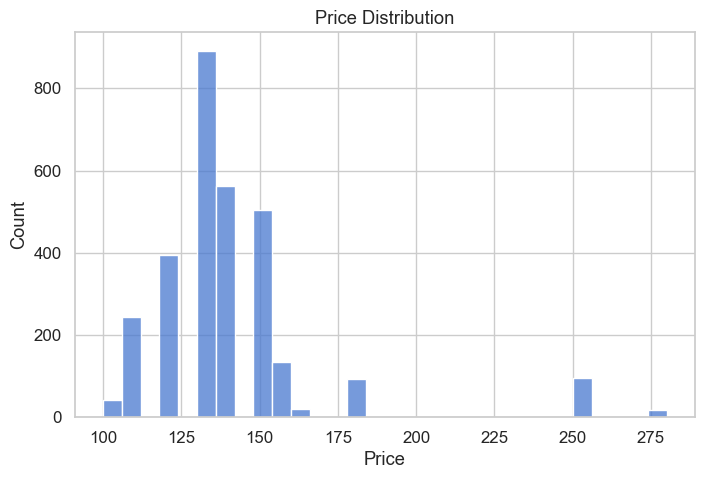

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(full_data['price'], bins=30)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.show()

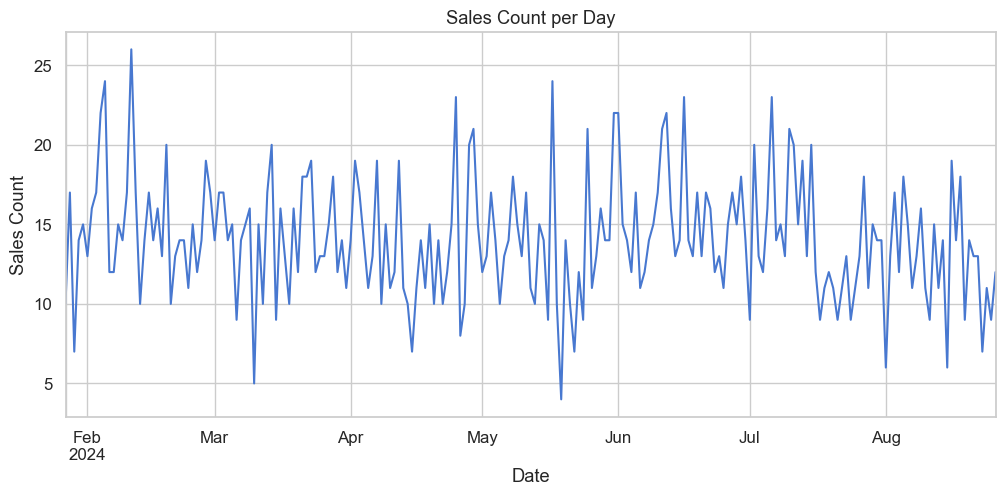

In [14]:
daily_sales = full_data.groupby("sale_date")['sale_id'].count()

plt.figure(figsize=(12,5))
daily_sales.plot()
plt.title("Sales Count per Day")
plt.xlabel("Date")
plt.ylabel("Sales Count")
plt.show()

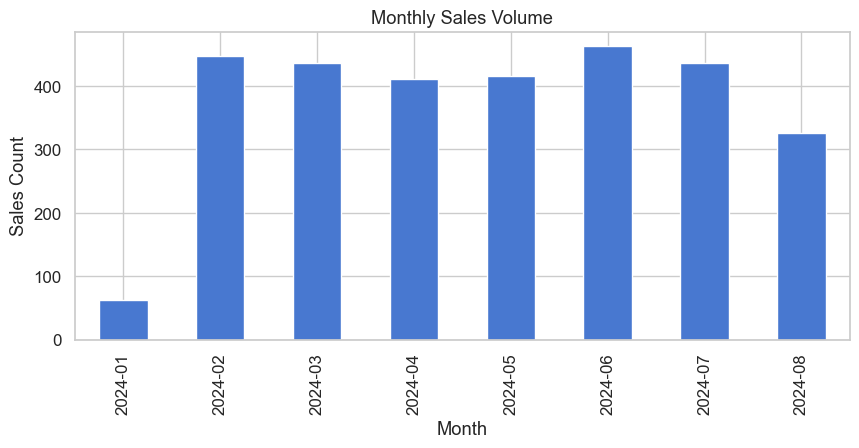

In [15]:
monthly_units = full_data.groupby('sale_month')['sale_id'].count()

monthly_units.plot(kind='bar', figsize=(10,4))
plt.title("Monthly Sales Volume")
plt.xlabel("Month")
plt.ylabel("Sales Count")
plt.show()

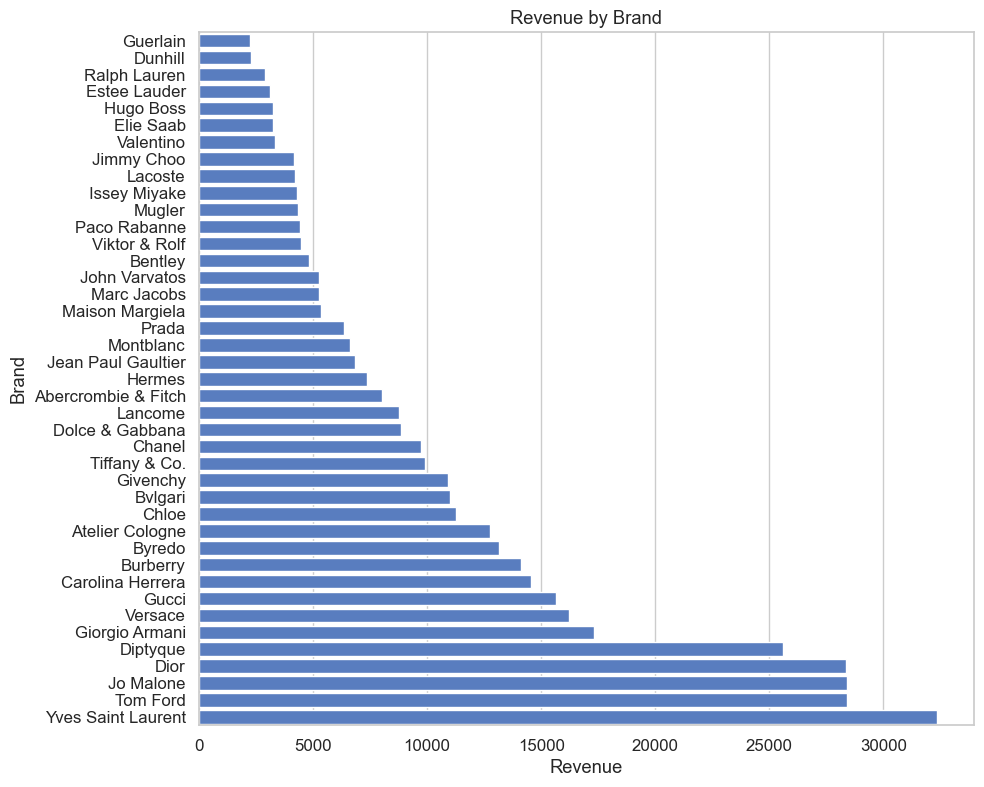

In [20]:
full_data['revenue'] = full_data['price']
brand_rev = full_data.groupby("brand")['revenue'].sum().sort_values()

plt.figure(figsize=(10,9))
sns.barplot(x=brand_rev.values, y=brand_rev.index)
plt.title("Revenue by Brand")
plt.xlabel("Revenue")
plt.ylabel("Brand")
plt.show()


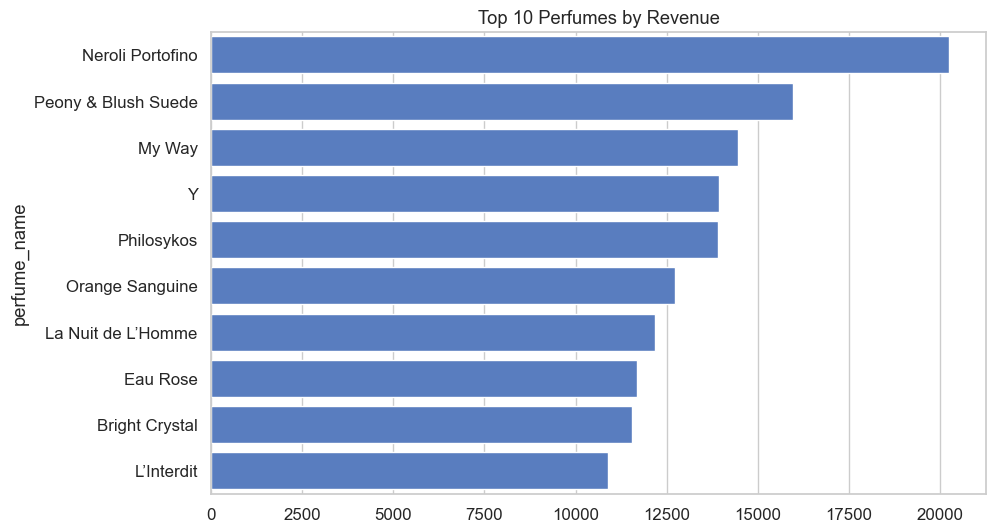

In [21]:
perfume_rev = full_data.groupby("perfume_name")['revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=perfume_rev.values, y=perfume_rev.index)
plt.title("Top 10 Perfumes by Revenue")
plt.show()

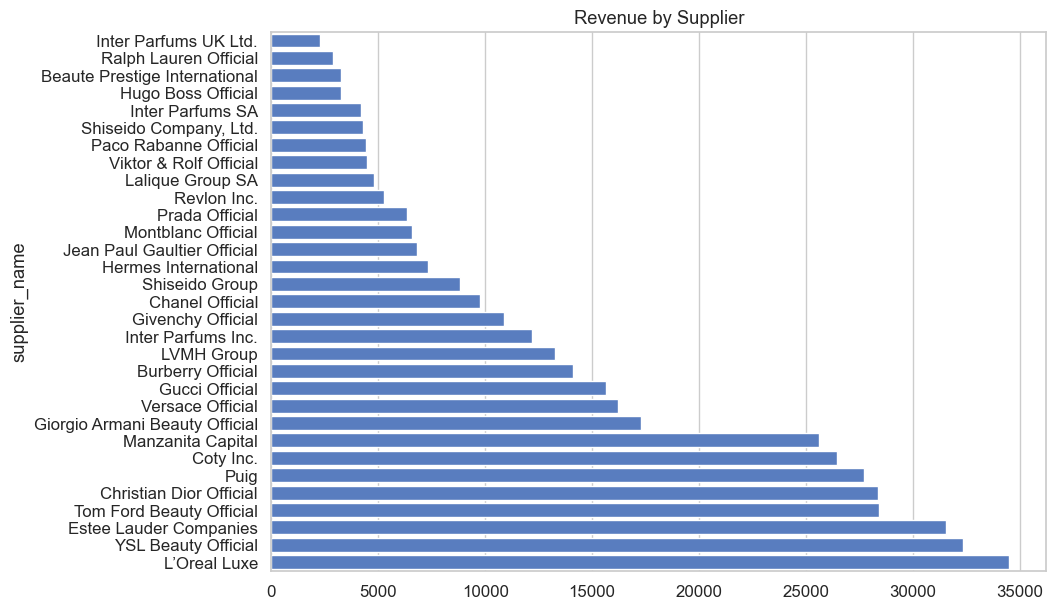

In [23]:
supplier_rev = full_data.groupby("supplier_name")["revenue"].sum().sort_values()

plt.figure(figsize=(10,7))
sns.barplot(x=supplier_rev.values, y=supplier_rev.index)
plt.title("Revenue by Supplier")
plt.show()

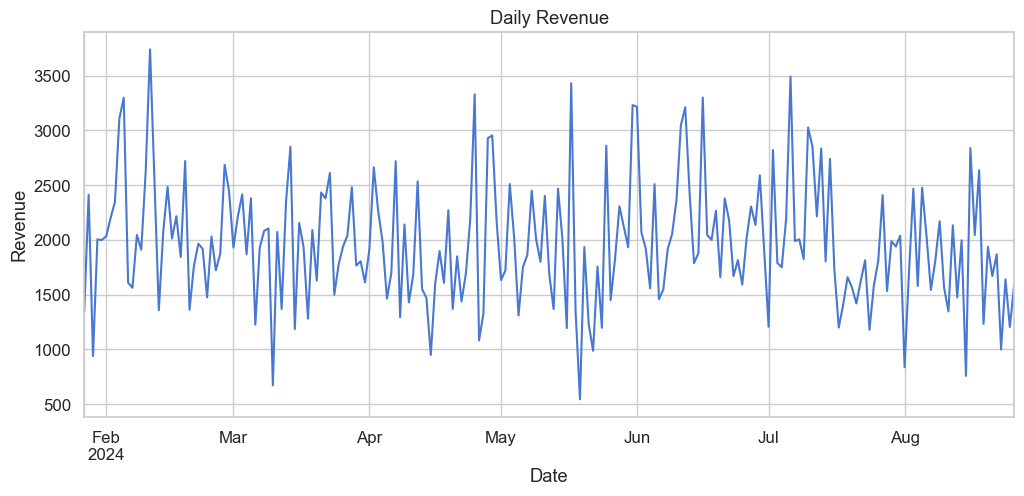

In [25]:
daily_rev = full_data.groupby("sale_date")["revenue"].sum()

plt.figure(figsize=(12,5))
daily_rev.plot()
plt.title("Daily Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

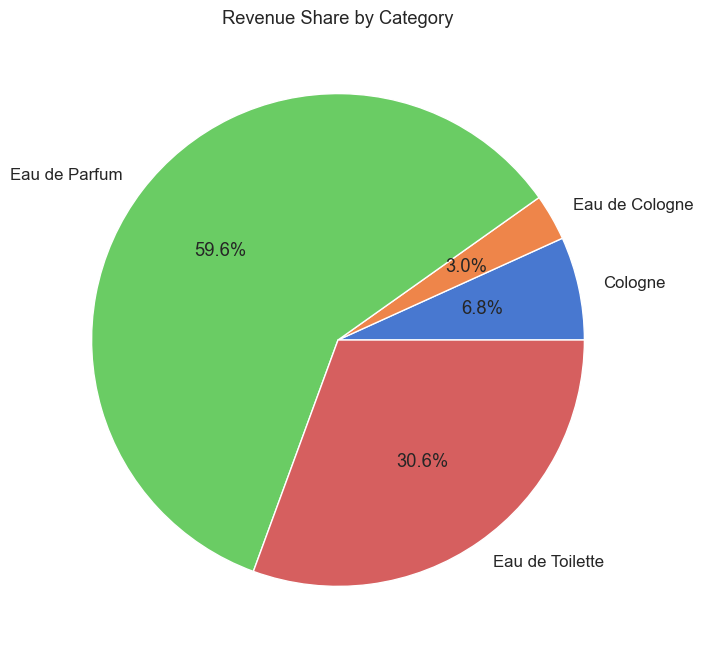

In [27]:
categ_share = full_data.groupby("category")["revenue"].sum()

plt.figure(figsize=(8,8))
plt.pie(categ_share.values, labels=categ_share.index, autopct='%1.1f%%')
plt.title("Revenue Share by Category")
plt.show()

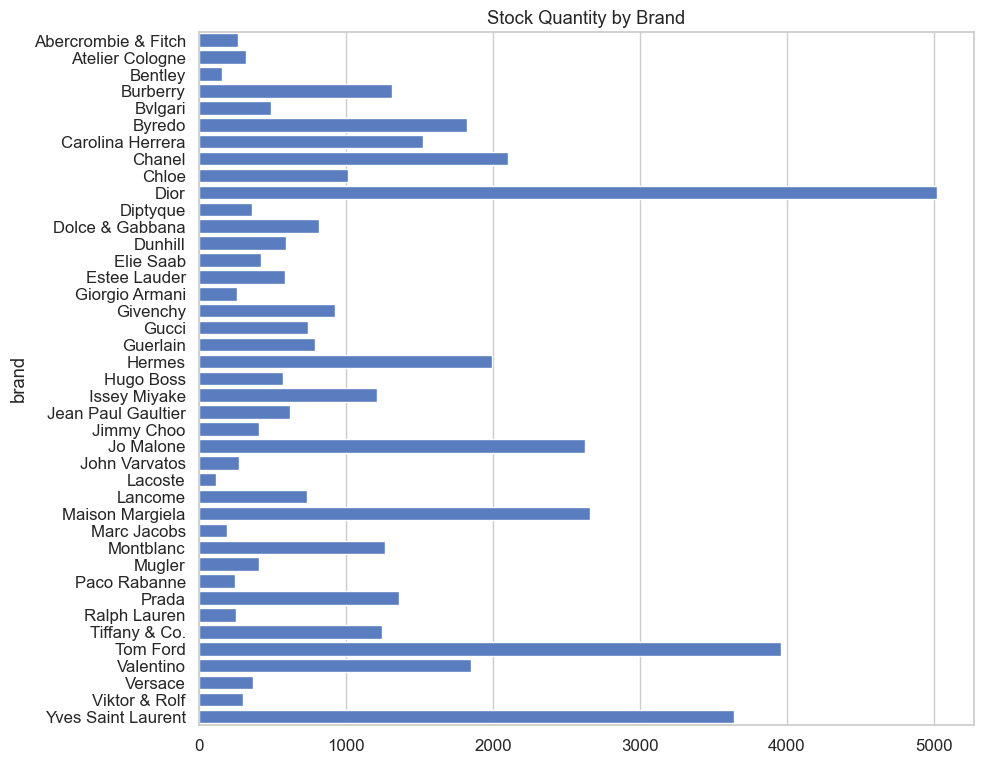

In [35]:
inventory = pd.read_csv (r"C:\Users\user\Desktop\perfume\tables\inventory_perfumes.csv")
products = pd.read_csv (r"C:\Users\user\Desktop\perfume\tables\products_perfume.csv")
stock_brand =  inventory.merge(products, on='perfume_id').groupby("brand")['stock_quantity'].sum()

plt.figure(figsize=(10,9))
sns.barplot(x=stock_brand.values, y=stock_brand.index)
plt.title("Stock Quantity by Brand")
plt.show()